# Downsampling Sanity Checks

Hi Ed,

Here are some example down-sampling "unit tests".  

Data from the Sept 14 event is downloaded and loaded, with a 16 kHz sampling rate.

The data is decimated by a factor of 4.

The before and after down-sampling data are compared in the frequency domain in 3 ways: the PSD, the magnitude, and the phase.  All three plots appear reasonably close before and after.

I think you could apply a test like this to data that is down-sampled using any method, and so it could be adopted to the RDS code.

Please let me know if there's anything else I can do to help.

Best,
 jonah

## Set GPS time and data set
Example GPS times for <a href='https://losc.ligo.org/s6hwcbc/'>S6 Hardware Injections</a>

In [1]:
#t0 = 933661015.0  # Time of a successful s6 hardware injection in H1 (SNR 140)
t0 = 932422615.0 # Time of a successful s6 hardware injection in H1 (SNR 40)
dataset = 'S6'
detector = 'H1'
version = 'V1'  # V1 is "version 1" of the data release

## Download the data file
See also <a href='https://losc.ligo.org/tutorial_get_data2/'>this download tutorial.</a>

In [2]:
import json
import urllib2

observatory = detector[0]         # first letter of the detector H or L
hour        = int(t0)&0xFFFFF000  # the filename rounding down to a multiple of 4096
fortnight   = int(t0)&0xFFF00000  # the directory by rounding down to multiple of 4096*256
filename = '{0}-{1}_LOSC_4_{2}-{3}-4096.hdf5'.format(observatory, detector, version, hour)
urlformat = 'https://losc.ligo.org/archive/data/{0}/{1}/{2}'
url = urlformat.format(dataset, fortnight, filename)

# -- Uncomment these 3 lines to run this notebook on GW150914 instead!
t0 = 1126259462.43 # GW150914
url = 'https://losc.ligo.org/s/events/GW150914/H-H1_LOSC_4_V1-1126259446-32.hdf5'
filename = url.split('/')[-1]

In [3]:
print('Downloading ' + url + '  (this might take a few minutes...)')
r = urllib2.urlopen(url).read()
f = open(filename, 'w')   # write it to the right filename
f.write(r)
f.close()
print("File download complete")

File download complete


## Import some python modules

In [4]:
# Standard python numerical analysis imports:
import numpy as np
from scipy import signal
from scipy.interpolate import interp1d
from scipy.signal import butter, filtfilt, iirdesign, zpk2tf, freqz

# the ipython magic below must be commented out in the .py file, since it doesn't work.
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import h5py

# LIGO-specific readligo.py 
import readligo as rl

**NOTE** Watch out for data gaps! See notes on the LOSC website, for example here: https://losc.ligo.org/segments/

## Load data

In [5]:
strain, time, chan_dict_H1 = rl.loaddata(filename, 'H1')

# the time sample interval (uniformly sampled!)
dt = time[1] - time[0]
fs = int(np.round(1/dt))
rel_time = time - t0

print("Got a sample frequency of {0}".format(fs))
print ("Found {0} seconds of data".format(strain.size*dt))

Got a sample frequency of 4096
Found 32.0 seconds of data


## Downsample

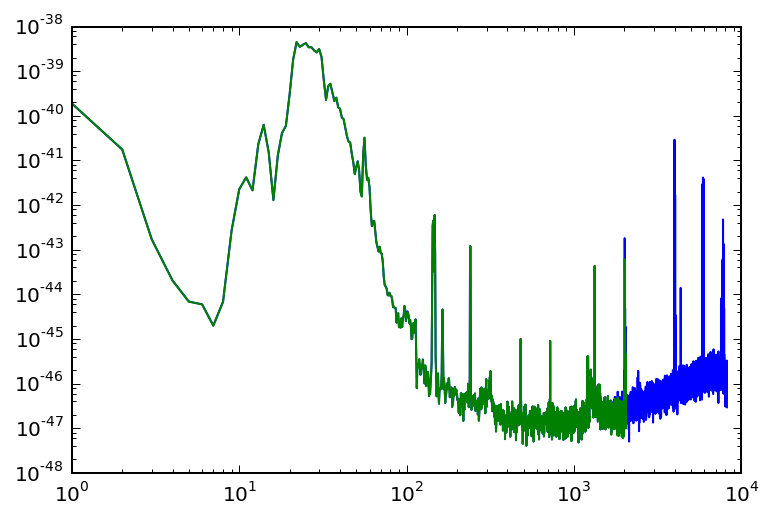

In [6]:
factor = 4
numtaps = 61
strain_4 = signal.decimate(strain, factor, numtaps-1,ftype='fir')

# -- Plot PSD
# Make PSDs of each:
fs = 16384
NFFT = 1*fs
Pxx_16, freqs_16 = mlab.psd(strain, Fs = fs, NFFT = NFFT)

fs = 4096
NFFT = 1*fs
Pxx_4, freqs_4 = mlab.psd(strain_4, Fs = fs, NFFT = NFFT)

plt.figure()
plt.loglog(freqs_16, Pxx_16)
plt.loglog(freqs_4, Pxx_4)

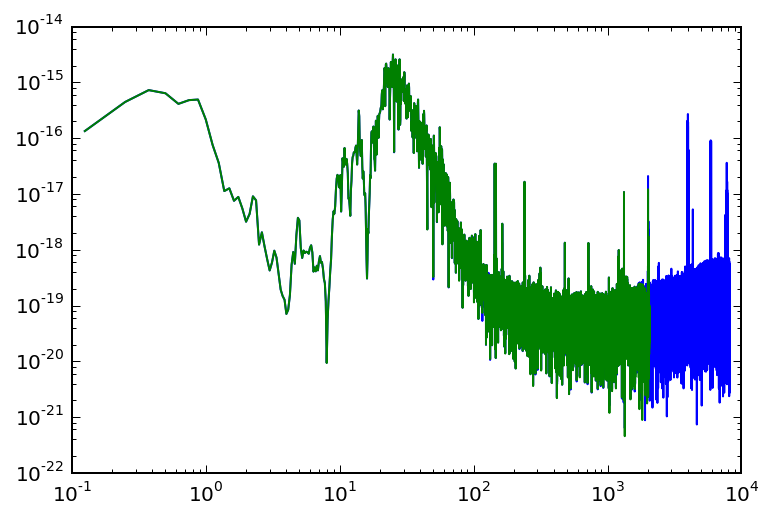

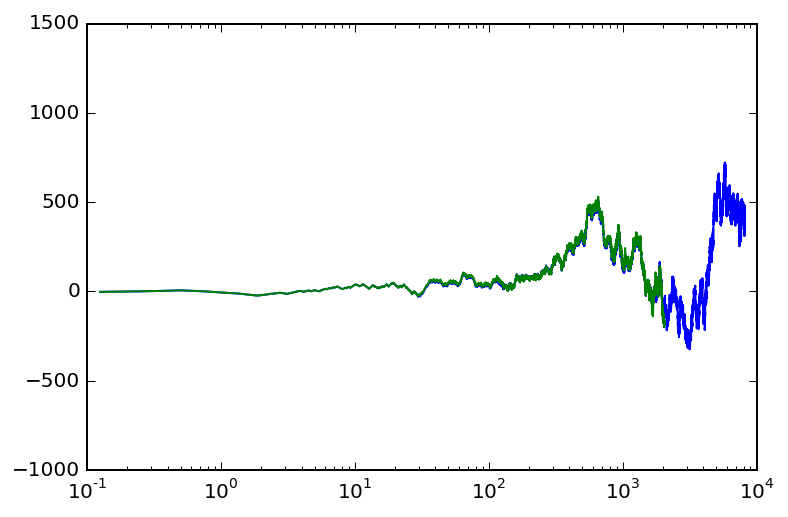

In [8]:
## - Try an FFT

window = np.blackman(strain.size)
fft_16 = np.fft.fft(window*strain)
fft_freq_16 = np.fft.fftfreq(strain.size)*16384

window = np.blackman(strain_4.size)
fft_4 = np.fft.fft(window*strain_4)
fft_freq_4 = np.fft.fftfreq(strain_4.size)*4096

plt.figure()
plt.loglog(fft_freq_16, np.abs(fft_16))
plt.loglog(fft_freq_4, np.abs(fft_4)*4)

plt.figure()
plt.semilogx(fft_freq_16, np.unwrap(np.angle(fft_16)))
plt.semilogx(fft_freq_4, np.unwrap(np.angle(fft_4)))

This research has made use of data, software and/or web tools obtained from the LIGO Open Science Center (https://losc.ligo.org), a service of LIGO Laboratory and the LIGO Scientific Collaboration. LIGO is funded by the U.S. National Science Foundation.